In [ ]:
import pandas as pd
data=pd.read_csv('/content/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


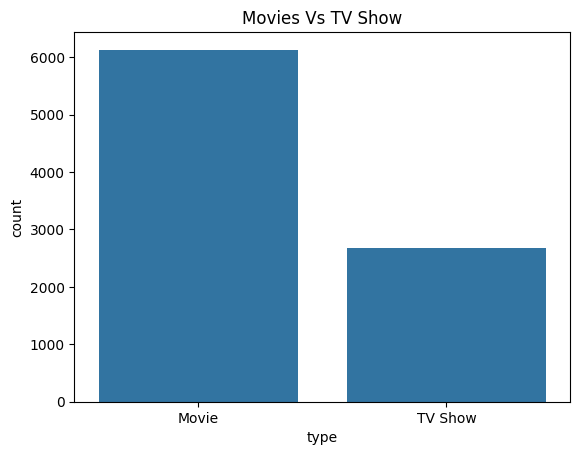

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=data,x='type')
plt.title("Movies Vs TV Show")
plt.show()

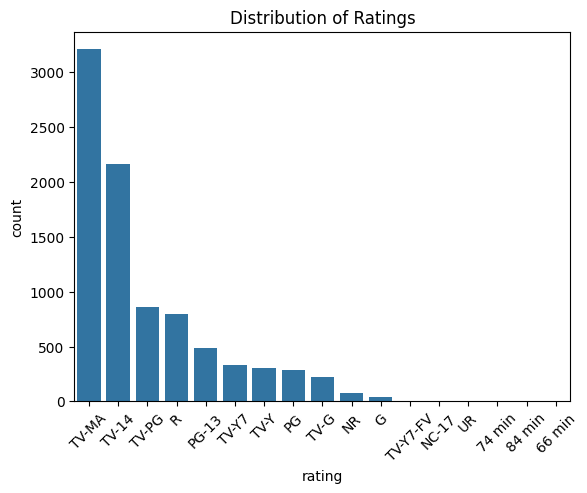

In [ ]:
sns.countplot(data=data,x='rating',order=data['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Ratings")
plt.show()

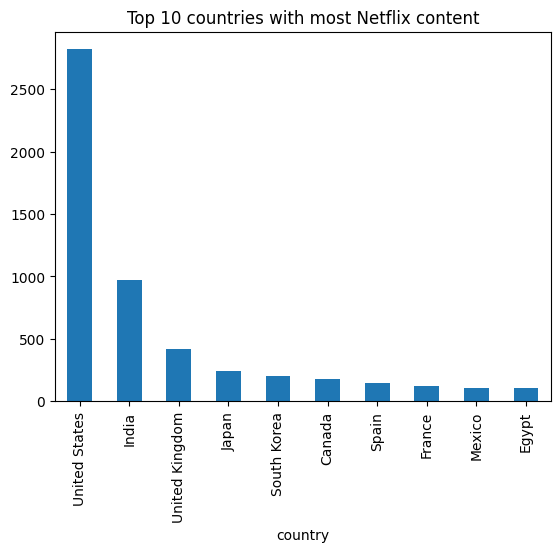

In [ ]:
data['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 countries with most Netflix content")
plt.show()

In [ ]:
data['date_added'] = data['date_added'].str.strip()
data['date_added']=pd.to_datetime(data['date_added'],errors='coerce')
data['year_added']=data['date_added'].dt.year
data['month_added']=data['date_added'].dt.month

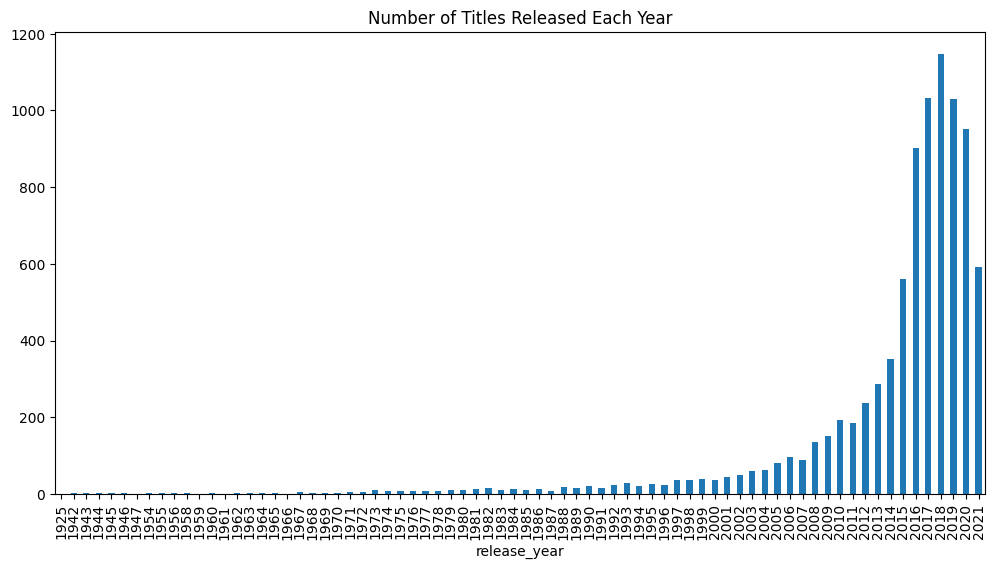

In [ ]:
data['release_year'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.title("Number of Titles Released Each Year")
plt.show()

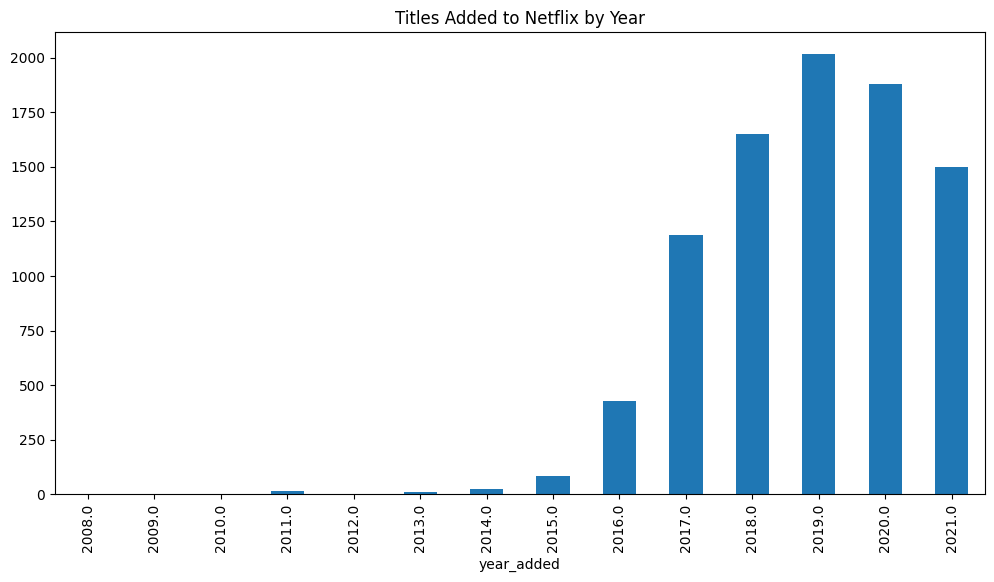

In [ ]:
data['year_added'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.title("Titles Added to Netflix by Year")
plt.show()

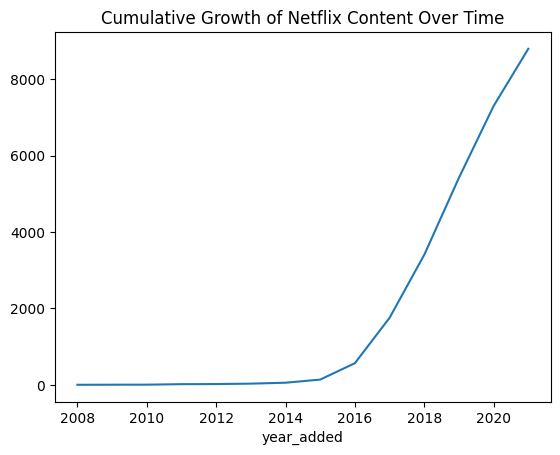

In [ ]:
data['year_added'].value_counts().sort_index().cumsum().plot()
plt.title("Cumulative Growth of Netflix Content Over Time")
plt.show()

/tmp/ipython-input-3930437531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['min_duration']=movies['duration'].str.replace('min','').astype(float)


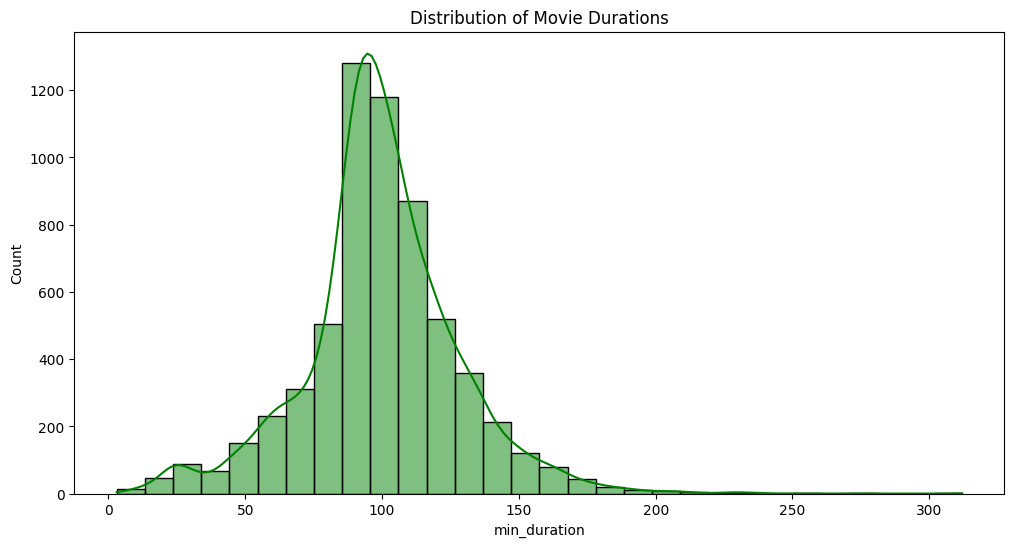

In [ ]:
movies=data[data['type']=='Movie']
movies['min_duration']=movies['duration'].str.replace('min','').astype(float)

plt.figure(figsize=(12,6))
sns.histplot(movies['min_duration'],bins=30,kde=True,color='green')
plt.title("Distribution of Movie Durations")
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3577683809.py:2: SyntaxWarning: invalid escape sequence '\d'
  tv['season']=tv['duration'].str.extract('(\d+)').astype(int)
/tmp/ipython-input-3577683809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv['season']=tv['duration'].str.extract('(\d+)').astype(int)


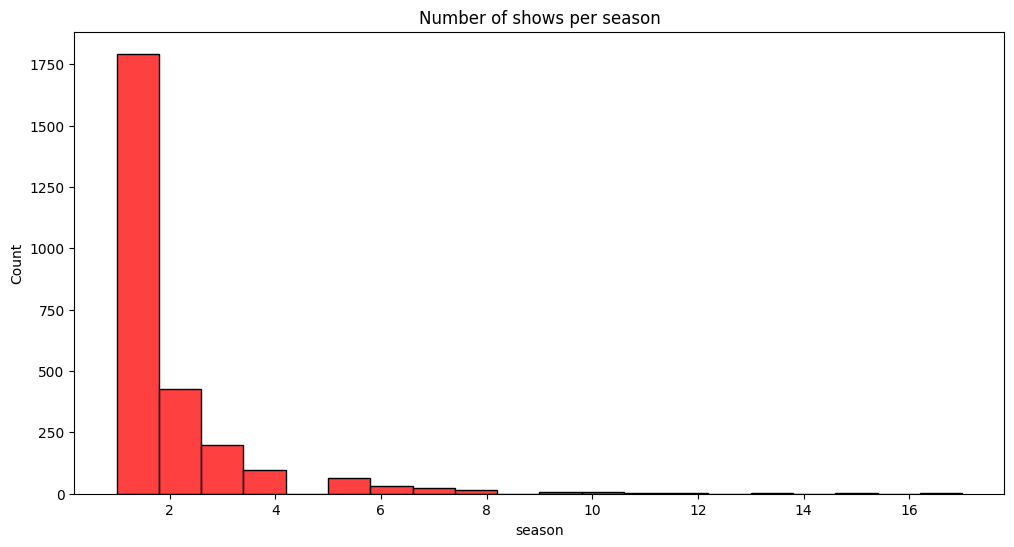

In [ ]:
tv=data[data['type']=='TV Show']
tv['season']=tv['duration'].str.extract('(\d+)').astype(int)
plt.figure(figsize=(12,6))
sns.histplot(data=tv,x='season',bins=20, color='red')
plt.title("Number of shows per season")
plt.show();

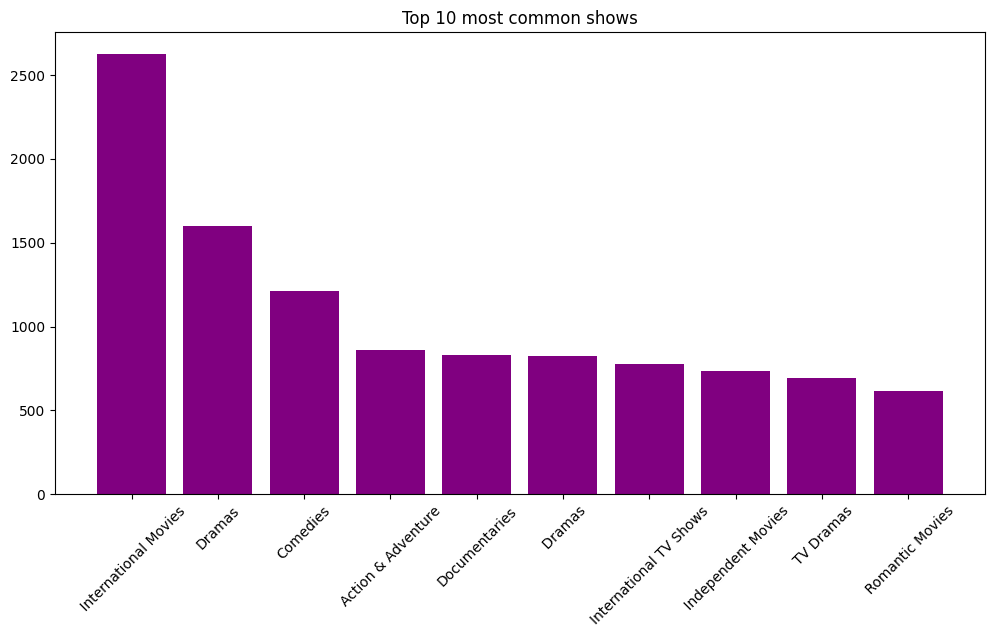

In [ ]:
from collections import Counter
from pandas import DataFrame
all_genre=data['listed_in'].str.split(",")
genres=[g for x in all_genre for g in x]
genre_count=Counter(genres).most_common(10)
genre_df=pd.DataFrame(genre_count,columns=['genres','count'])
plt.figure(figsize=(12,6))
plt.bar(x=genre_df['genres'],height=genre_df['count'],color='purple')
plt.title("Top 10 most common shows")
plt.xticks(rotation=45)
plt.show()

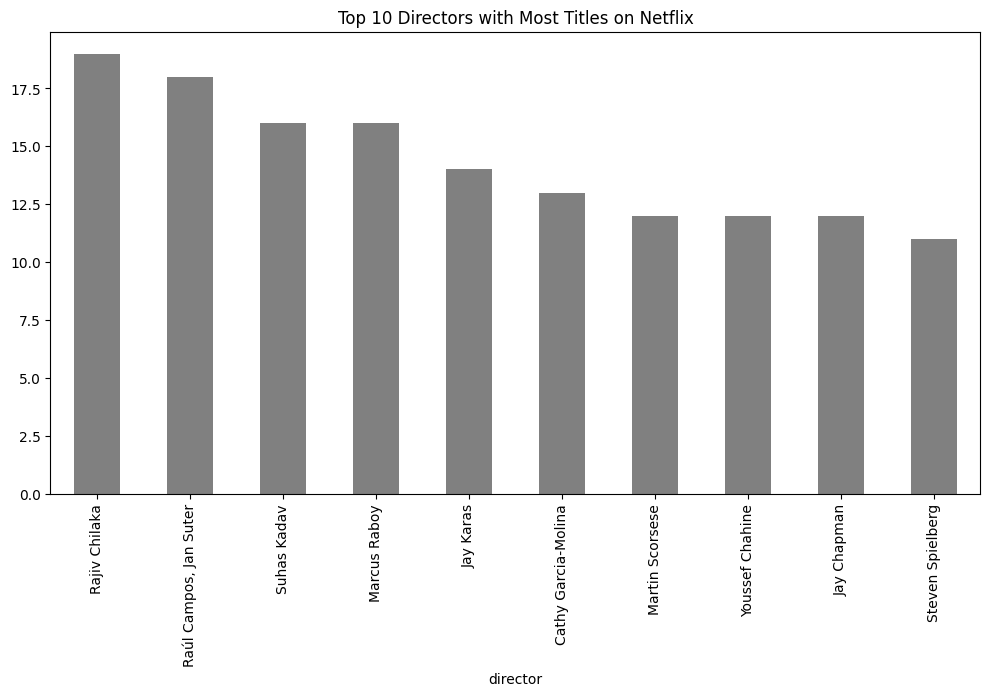

In [ ]:
plt.figure(figsize=(12,6))
data['director'].value_counts().head(10).plot(kind='bar',color='grey')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.show()

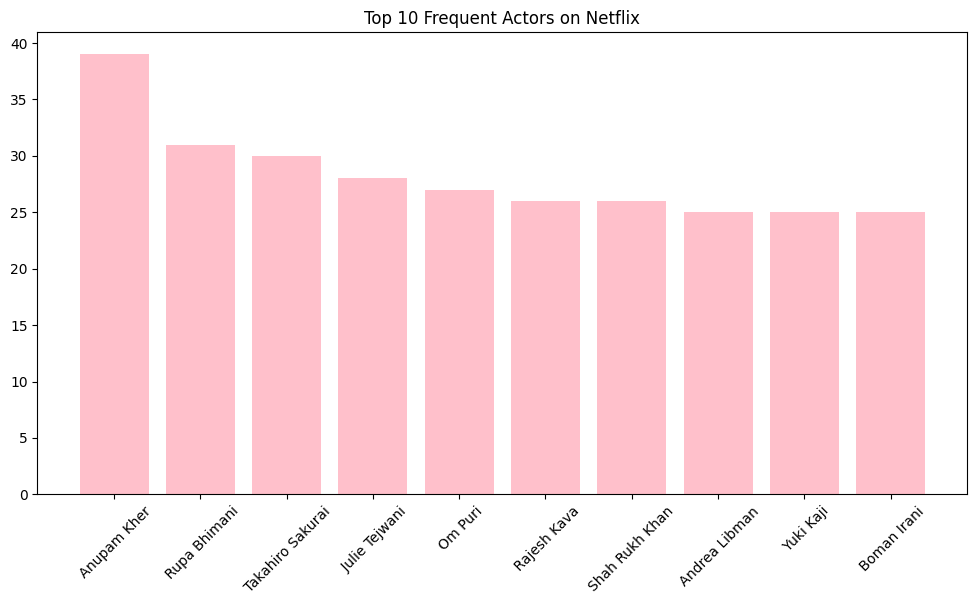

In [ ]:
cast=data['cast'].dropna().str.split(",")
casted=[c for i in cast for c in i]
cast_count=Counter(casted).most_common(10)
cast_df=pd.DataFrame(cast_count,columns=['cast','count'])
plt.figure(figsize=(12,6))
plt.bar(x=cast_df['cast'],height=cast_df['count'],color='pink')
plt.title("Top 10 Frequent Actors on Netflix")
plt.xticks(rotation=45)
plt.show()

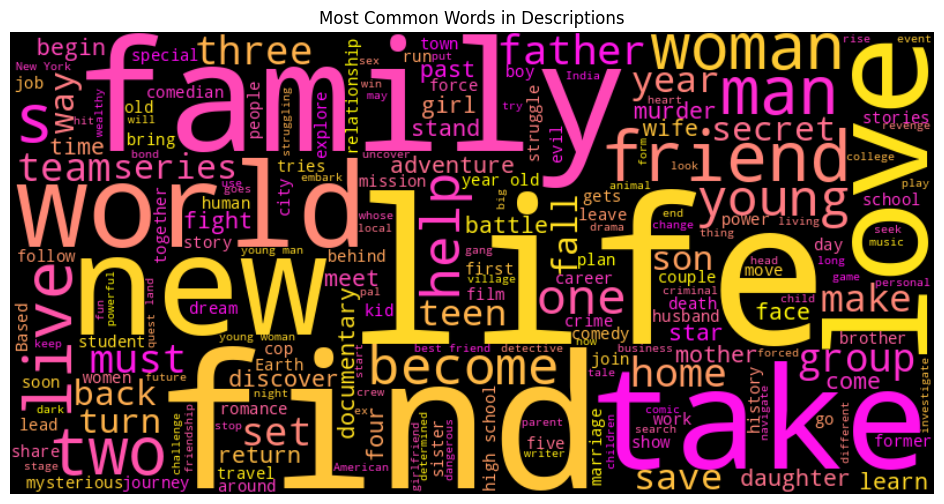

In [ ]:
from wordcloud import WordCloud
text=" ".join(des for des in data['description'].dropna())
wc=WordCloud(height=400,width=800,background_color='black',colormap='spring').generate(text)

plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc,interpolation='bilinear')
plt.title("Most Common Words in Descriptions")
plt.show()

/tmp/ipython-input-787345452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='month_added',palette='cool')


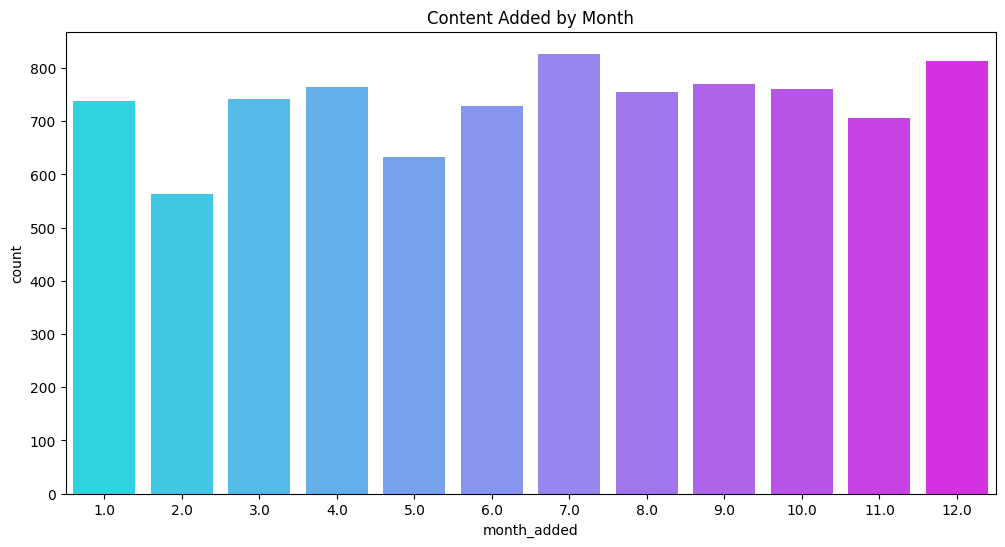

In [ ]:
data['month_added']=data['date_added'].dt.month
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='month_added',palette='cool')
plt.title("Content Added by Month")
plt.show()

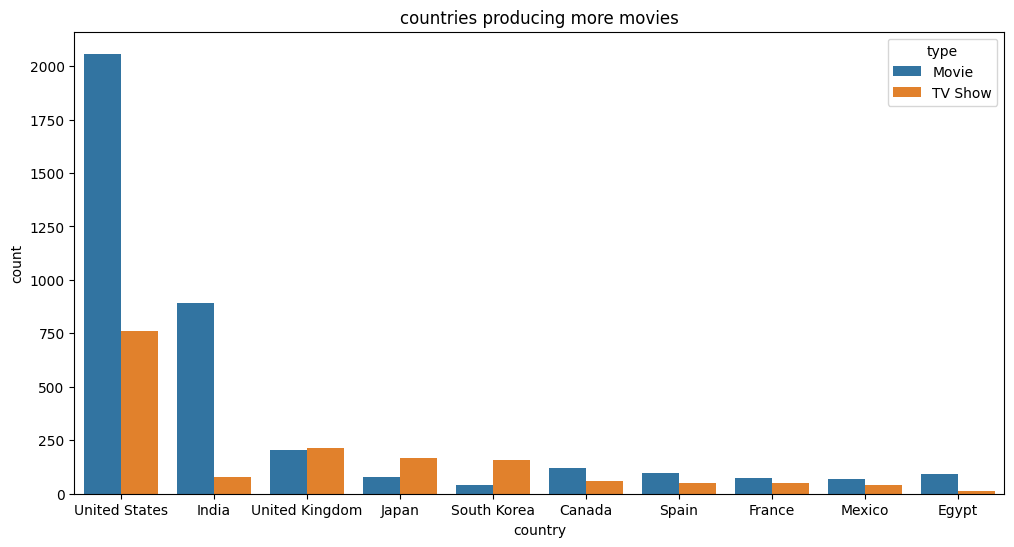

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='country', hue='type', order=data['country'].value_counts().index[:10])
plt.title("countries producing more movies")
plt.show()

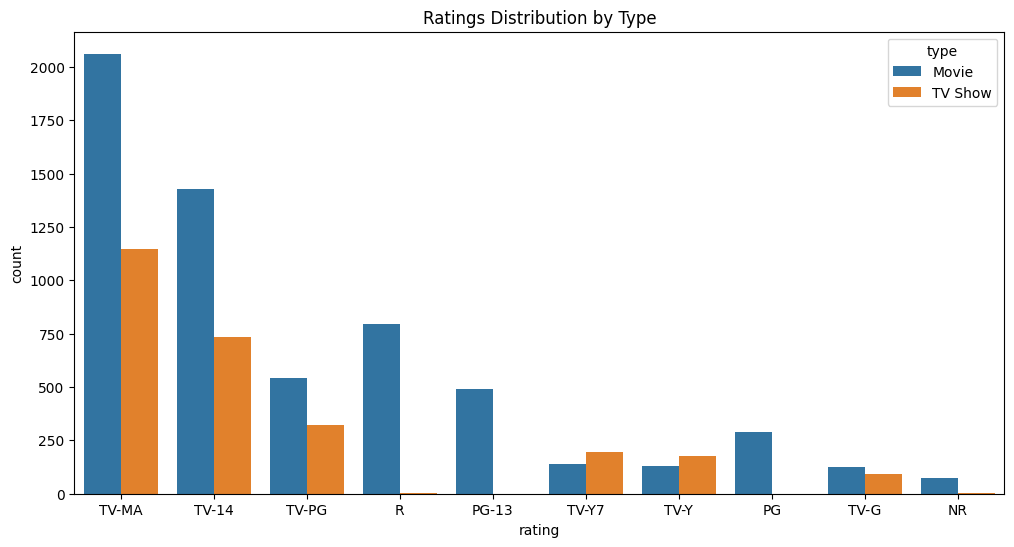

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='rating', hue='type', order=data['rating'].value_counts().index[:10])
plt.title("Ratings Distribution by Type")
plt.show()

In [ ]:
print("Oldest title:",data.loc[data['release_year'].idxmin()])
print("Oldest title:",data.loc[data['release_year'].idxmax()])

Oldest title: show_id                                                     s4251
type                                                      TV Show
title                           Pioneers: First Women Filmmakers*
director                                                      NaN
cast                                                          NaN
country                                                       NaN
date_added                                    2018-12-30 00:00:00
release_year                                                 1925
rating                                                      TV-14
duration                                                 1 Season
listed_in                                                TV Shows
description     This collection restores films from women who ...
year_added                                                 2018.0
month_added                                                  12.0
Name: 4250, dtype: object
Oldest title: show_id               

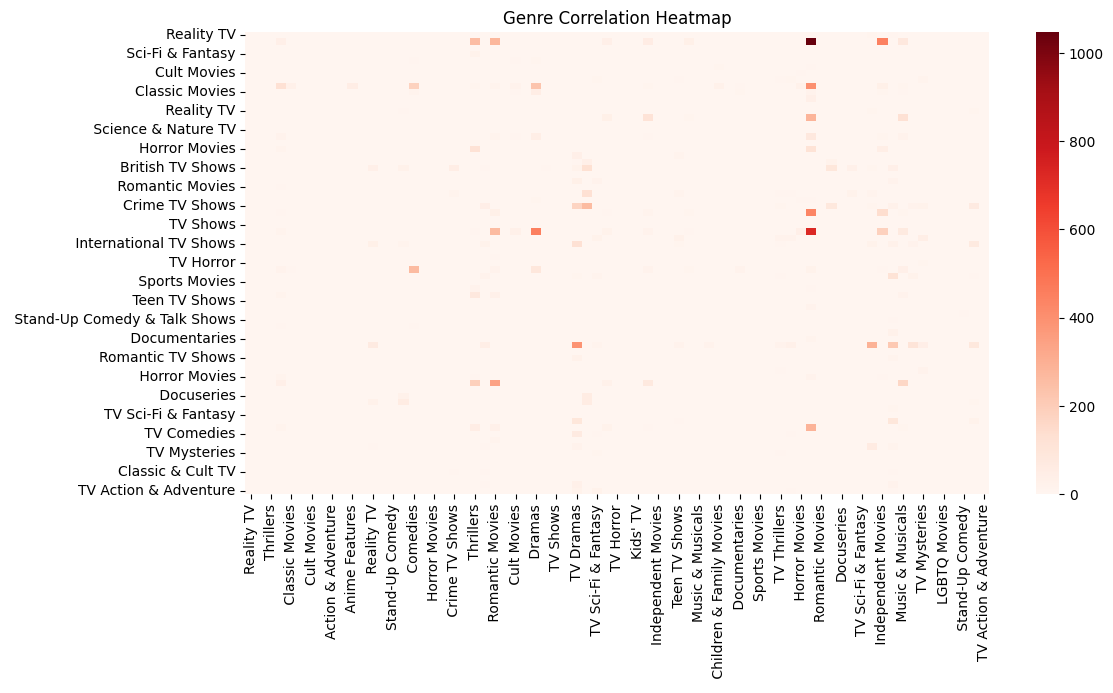

In [ ]:
from itertools import combinations
import numpy as np
genre_list=list(set(genres))
co_matrix=pd.DataFrame(0,index=genre_list,columns=genre_list)

for i in all_genre:
  for g1,g2 in combinations(i,2):
    co_matrix.loc[g1,g2]+=1
    co_matrix.loc[g2,g1]+-1

plt.figure(figsize=(12,6))
sns.heatmap(co_matrix,cmap='Reds')
plt.title("Genre Correlation Heatmap")
plt.show()